Ce notebook charge les données des contours disponibles sur Atlasante avec les paramètres suivants :

- **Format des données** : ESRI (shp)
- **Projection** : Lambert 93 EPSG:2154

**objectif de ce notebook: comparasion des donnees des trois ressources sur Atlasante.**
Les liens vers les fichiers:

- Direction Générale de la Santé - Unités de distribution (UDI) et infofactures: https://catalogue.atlasante.fr/geosource/panierDownloadFrontalParametrage/d51b5c43-812d-420f-a641-83e18ddb8628
- Direction Générale de la Santé - Métropole - Unités de distribution (UDI) - 2023: https://catalogue.atlasante.fr/geosource/panierDownloadFrontalParametrage?LAYERIDTS=16300771
- Direction Générale de la Santé - Métropole - Unités de distribution (UDI) - 2022: https://catalogue.atlasante.fr/geosource/panierDownloadFrontalParametrage?LAYERIDTS=16215201


In [ ]:
# pakages
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from pipelines.tasks.config.common import CACHE_FOLDER
from pipelines.tasks.config.common import DUCKDB_FILE
import duckdb
import pandas as pd


In [104]:
# path of three fichier, telecharger les fichiers et cree un folder.
REPERTOIRE_DATA_ATLASANTE = Path(
    CACHE_FOLDER,
    "Telechargement_1741623465_2416/d51b5c43-812d-420f-a641-83e18ddb8628_1741623465_7231",
)
REPERTOIRE_DATA_ATLASANTE_22 = Path(
    CACHE_FOLDER,
    "Telechargement_1741616431_2820/9e02e73f-422b-46e9-8cbf-7384083180e7_1741616431_3301",
)
REPERTOIRE_DATA_ATLASANTE_23 = Path(
    CACHE_FOLDER,
    "Telechargement_1741616513_7189/4e35f55a-e09f-4f92-9428-1d8c8ddc9c14_1741616513_6948",
)

CONTOURS_UDI = "dgs_metropole_udi_infofactures_j.shp"
CONTOURS_UDI_2022 = "dgs_metropole_udi_2022_j.shp"
CONTOURS_UDI_2023 = "dgs_metropole_udi_2023_j.shp"

In [105]:
# check the info of dgs_metropole_udi_infofactures_j.shp
dgs_info_path = Path(REPERTOIRE_DATA_ATLASANTE, CONTOURS_UDI)
gdf_udi = gpd.read_file(str(dgs_info_path))
gdf_udi = gdf_udi[~gdf_udi["code_udi"].isnull()]
gdf_udi["code_udi"] = gdf_udi["code_udi"].astype(str)


gdf_udi.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22753 entries, 0 to 22758
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         22753 non-null  int64   
 1   code_udi    22753 non-null  object  
 2   code_ins    22720 non-null  object  
 3   ins_nom     22720 non-null  object  
 4   ins_etat    22720 non-null  object  
 5   udi_pop     14076 non-null  object  
 6   uge_code    22720 non-null  object  
 7   uge_nom     22720 non-null  object  
 8   uge_exp_cn  22720 non-null  object  
 9   uge_exp_no  22720 non-null  object  
 10  uge_mo_cn   22720 non-null  object  
 11  uge_mo_nom  22720 non-null  object  
 12  geometry    22753 non-null  geometry
dtypes: geometry(1), int64(1), object(11)
memory usage: 2.4+ MB


/Users/llf/open-source/13_pollution_eau_d4g/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: /Users/llf/open-source/13_pollution_eau_d4g/database/cache/Telechargement_1741623465_2416/d51b5c43-812d-420f-a641-83e18ddb8628_1741623465_7231/dgs_metropole_udi_infofactures_j.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [106]:
# check the info of dgs_metropole_udi_2022_j.shp
dgs_info_path_22 = Path(REPERTOIRE_DATA_ATLASANTE_22, CONTOURS_UDI_2022)
gdf_udi_22 = gpd.read_file(str(dgs_info_path_22))
gdf_udi_22.info()
gdf_udi_22 = gdf_udi_22[~gdf_udi_22["code_udi"].isnull()]
gdf_udi_22["code_udi"] = gdf_udi_22["code_udi"].astype(str)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23233 entries, 0 to 23232
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       23233 non-null  int64   
 1   code_udi  23219 non-null  object  
 2   geometry  23232 non-null  geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 544.7+ KB


In [107]:
# check the info of dgs_metropole_udi_2023_j.shp
dgs_info_path_23 = Path(REPERTOIRE_DATA_ATLASANTE_23, CONTOURS_UDI_2023)
gdf_udi_23 = gpd.read_file(str(dgs_info_path_23))
gdf_udi_23 = gdf_udi_23[~gdf_udi_23["code_udi"].isnull()]
gdf_udi_23["code_udi"] = gdf_udi_23["code_udi"].astype(str)
gdf_udi_23.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 22753 entries, 0 to 22758
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       22753 non-null  int64   
 1   code_udi  22753 non-null  object  
 2   geometry  22753 non-null  geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 711.0+ KB


/Users/llf/open-source/13_pollution_eau_d4g/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: /Users/llf/open-source/13_pollution_eau_d4g/database/cache/Telechargement_1741616513_7189/4e35f55a-e09f-4f92-9428-1d8c8ddc9c14_1741616513_6948/dgs_metropole_udi_2023_j.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [ ]:
# comparer les donnees de 2022 et 2023
# 2022
unique_udi_22 = gdf_udi_22["code_udi"].nunique()
code_udis_exists_only_in22 = gdf_udi_22[
    ~gdf_udi_22["code_udi"].isin(gdf_udi_23["code_udi"])
]["code_udi"].unique()
len_code_udis_22_only = len(code_udis_exists_only_in22)

print(f"There are {unique_udi_22} unique UDI in 2022")
print(f"There are {len_code_udis_22_only} unique UDI exists only in 2022 but not 2023")
# 2023
unique_udi_23 = gdf_udi_23["code_udi"].nunique()
code_udis_exists_only_in23 = gdf_udi_23[
    ~gdf_udi_23["code_udi"].isin(gdf_udi_22["code_udi"])
]["code_udi"].unique()
len_code_udis_23_only = len(code_udis_exists_only_in23)

print(f"There are {unique_udi_23} unique UDI in 2023")
print(f"There are {len_code_udis_23_only} unique UDI exists only in 2022 but not 2023")

There are 23103 unique UDI in 2022
There are 632 unique UDI exists only in 2022 but not 2023
There are 22695 unique UDI in 2023
There are 224 unique UDI exists only in 2022 but not 2023


In [ ]:
# compare dgs_metropole_udi_2022_j with dgs_metropole_udi_infofactures_j.shp
code_udis_exists_only_in22 = gdf_udi_22[
    ~gdf_udi_22["code_udi"].isin(gdf_udi["code_udi"])
]["code_udi"].unique()

len_code = len(code_udis_exists_only_in22)
print(
    f"There are {len_code} different udi code exists only in gdf_udi_22 but not in gdf_udi"
)

# compare dgs_metropole_udi_2023_j with dgs_metropole_udi_infofactures_j.shp
total = gdf_udi["code_udi"].nunique()
total_23 = gdf_udi_23["code_udi"].nunique()

code_udis_exists_only_in23 = gdf_udi_23[
    ~gdf_udi_23["code_udi"].isin(gdf_udi["code_udi"])
]["code_udi"].unique()

len_code = len(code_udis_exists_only_in23)
print(
    f"There are total {total} unique udi code in gdf_udi and {total_23} unique udi code in gdf_udi_23."
)
print(
    f"{len(code_udis_exists_only_in23)} difference of code_udi between gdf_udi_23 and  gdf_udi"
)

There are 632 different udi code exists only in gdf_udi_22 but not in gdf_udi
There are total 22695 unique udi code in gdf_udi and 22695 unique udi code in gdf_udi_23.
0 difference of code_udi between gdf_udi_23 and  gdf_udi


In [ ]:
# comparer dgs_metropole_udi_infofactures_j avec edc_commune dans duckdb, voir la relation
con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

# get the edc_commune and compare the inseecode
# unique_code_ins = gdf_udi[gdf_udi['code_ins']]
# the cdreseau in edc_commune is equivalent of code_ins in gdf_udi(dgs_metropole_udi_infofactures_j)
sql = "Select inseecommune,nomcommune,nomreseau,cdreseau from edc_communes"
edc_com = con.execute(sql).df()
commun_code_ins = set(gdf_udi["code_ins"]).intersection(set(edc_com["cdreseau"]))
common_commnues = edc_com[edc_com["cdreseau"].isin(gdf_udi["code_ins"])]
merged_df = common_commnues.merge(
    gdf_udi[["code_ins", "code_udi", "ins_nom", "uge_nom"]],
    left_on="cdreseau",
    right_on="code_ins",
    how="inner",
)
merged_df.head()

con.close()

,inseecommune,nomcommune,nomreseau,cdreseau,code_ins,code_udi,ins_nom,uge_nom
0,01001,ABERGEMENT-CLEMENCIAT (L'),BDS ST DIDIER/CHALARONNE,001000556,001000556,001000556,BDS ST DIDIER/CHALARONNE,SI BRESSE DOMBES SAONE SAUR
1,01002,ABERGEMENT-DE-VAREY (L'),L'ABERGEMENT-DE-VAREY,001000369,001000369,001000369,L'ABERGEMENT-DE-VAREY,L'ABERGEMENT-DE-VAREY
2,01004,AMBERIEU-EN-BUGEY,AMBERIEU VAREILLES,001000248,001000248,001000248,AMBERIEU VAREILLES,SI REGION D'AMBERIEU-EN-BUGEY
3,01004,AMBERIEU-EN-BUGEY,AMBERIEU SAINT GERMAIN DOUVRES,001000249,001000249,001000249,AMBERIEU SAINT GERMAIN DOUVRES,SI REGION D'AMBERIEU-EN-BUGEY
4,01004,AMBERIEU-EN-BUGEY,AMBERIEU VILLE,001000251,001000251,001000251,AMBERIEU VILLE,SI REGION D'AMBERIEU-EN-BUGEY


<Axes: >

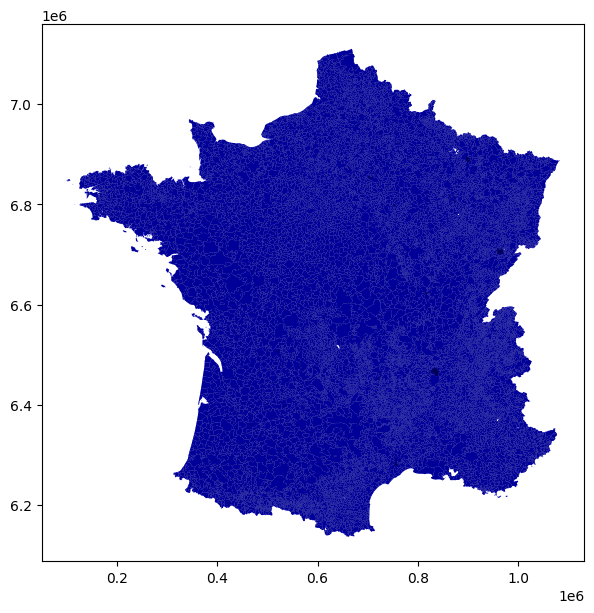

In [36]:
fig, ax = plt.subplots(figsize=(7, 7))
gdf_udi_22.plot(ax=ax, alpha=0.4, color="black", zorder=10)
gdf_udi_22.plot(ax=ax, markersize=20, color="blue", marker="o", zorder=2)

<Axes: >

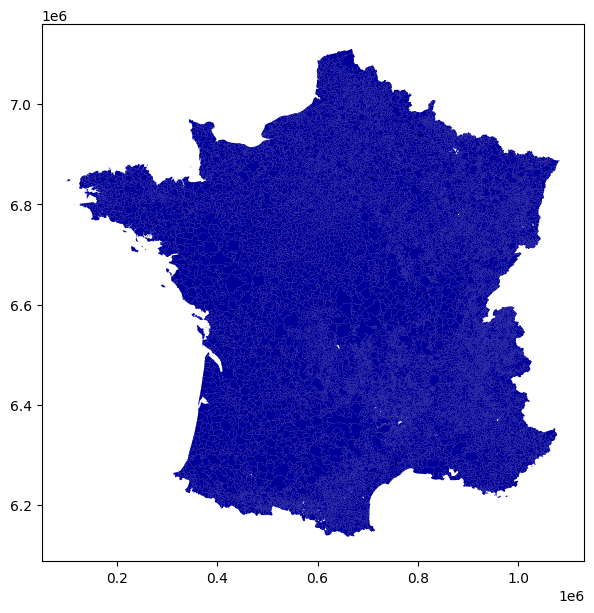

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
gdf_udi_23.plot(ax=ax, alpha=0.4, color="black", zorder=10)
gdf_udi_23.plot(ax=ax, markersize=20, color="blue", marker="o", zorder=2)